In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Input movie data sets
moviesdata = pd.read_csv("movies.dat", sep='::', engine='python', encoding='latin1')
moviesdata.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
# to add the title 
moviesdata.columns = ["MovieID","Moviename","Genres"]
moviesdata.dropna(inplace= True)
moviesdata.head()


,MovieID,Moviename,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
# Input users data set 
usersdata =  pd.read_csv("users.dat", sep='::', engine='python', encoding='latin1')
usersdata.head(10)

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [5]:
# add .columns = title to the above data
usersdata.columns = ["userid", "Gender","Age", "director", "zipcode"]
usersdata.dropna(inplace = True)
usersdata.head()

,userid,Gender,Age,director,zipcode
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
# Input ratings data set 
Ratings = pd.read_csv("ratings.dat", sep='::', engine='python', encoding='latin1')
Ratings.head(20)

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [7]:
# To add title
Ratings.columns = ["userid", "MovieID","rating", "timestamp"]
Ratings.dropna(inplace = True)
Ratings.head()

,userid,MovieID,rating,timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [8]:
# to merge the data in different data sets
#Merging the data sets one by one
# Ratings data set contains user ID which can be used to merge the user data set with ratings data set.
user_ratings = pd.merge(Ratings,usersdata, on = ["userid"])
#<similarly ratings and movie data sets can be merged using movie ID
movie_ratings = pd.merge(Ratings, moviesdata, on = ["MovieID"])
user_ratings.head()


,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode
0,2,1357,5,978298709,M,56,16,70072
1,2,3068,4,978299000,M,56,16,70072
2,2,1537,4,978299620,M,56,16,70072
3,2,647,3,978299351,M,56,16,70072
4,2,2194,4,978299297,M,56,16,70072


In [9]:
movie_ratings.head()

,userid,MovieID,rating,timestamp,Moviename,Genres
0,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
1,23,661,2,978460739,James and the Giant Peach (1996),Animation|Children's|Musical
2,49,661,3,977972750,James and the Giant Peach (1996),Animation|Children's|Musical
3,53,661,5,977979726,James and the Giant Peach (1996),Animation|Children's|Musical
4,57,661,4,977935511,James and the Giant Peach (1996),Animation|Children's|Musical


In [10]:
# Merge both user_ratings and movie_ratings to get one data set
Data = pd.merge(user_ratings,movie_ratings,on=['userid', 'MovieID', 'rating',"timestamp"], how= "left") 
Data.head()

,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode,Moviename,Genres
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
1,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",Drama
2,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),Comedy
3,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),Drama|War
4,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",Action|Crime|Drama


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000156 entries, 0 to 1000155
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userid     1000156 non-null  int64 
 1   MovieID    1000156 non-null  int64 
 2   rating     1000156 non-null  int64 
 3   timestamp  1000156 non-null  int64 
 4   Gender     1000156 non-null  object
 5   Age        1000156 non-null  int64 
 6   director   1000156 non-null  int64 
 7   zipcode    1000156 non-null  object
 8   Moviename  998080 non-null   object
 9   Genres     998080 non-null   object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [12]:
# Extract the year from 'movie_name' using regular expressions
Data['release_year'] = Data['Moviename'].str.extract(r'\((\d{4})\)')

In [13]:
Data.head()

,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode,Moviename,Genres,release_year
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance,1996
1,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",Drama,1982
2,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),Comedy,1996
3,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),Drama|War,1996
4,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",Action|Crime|Drama,1987


In [14]:
# Extract the name from the movie name and add it a column 
Data['movie_name'] = Data['Moviename'].str.extract(r'^(.*?)\s\(\d{4}\)')
Data.head()

,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode,Moviename,Genres,release_year,movie_name
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance,1996,Shine
1,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",Drama,1982,"Verdict, The"
2,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),Comedy,1996,Shall We Dance? (Shall We Dansu?)
3,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),Drama|War,1996,Courage Under Fire
4,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",Action|Crime|Drama,1987,"Untouchables, The"


In [15]:
# We are now going to extract the year of the film released and add it to another column

Data["Release year"] = Data["Moviename"].str.extract(r'\((\d{4})\)')
Data.head()

,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode,Moviename,Genres,release_year,movie_name,Release year
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance,1996,Shine,1996
1,2,3068,4,978299000,M,56,16,70072,"Verdict, The (1982)",Drama,1982,"Verdict, The",1982
2,2,1537,4,978299620,M,56,16,70072,Shall We Dance? (Shall We Dansu?) (1996),Comedy,1996,Shall We Dance? (Shall We Dansu?),1996
3,2,647,3,978299351,M,56,16,70072,Courage Under Fire (1996),Drama|War,1996,Courage Under Fire,1996
4,2,2194,4,978299297,M,56,16,70072,"Untouchables, The (1987)",Action|Crime|Drama,1987,"Untouchables, The",1987


In [16]:
# delete the older column 
# This will help us to split the movie name and year in perfect format.

del Data["Moviename"]

In [17]:
Data.head()

,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode,Genres,release_year,movie_name,Release year
0,2,1357,5,978298709,M,56,16,70072,Drama|Romance,1996,Shine,1996
1,2,3068,4,978299000,M,56,16,70072,Drama,1982,"Verdict, The",1982
2,2,1537,4,978299620,M,56,16,70072,Comedy,1996,Shall We Dance? (Shall We Dansu?),1996
3,2,647,3,978299351,M,56,16,70072,Drama|War,1996,Courage Under Fire,1996
4,2,2194,4,978299297,M,56,16,70072,Action|Crime|Drama,1987,"Untouchables, The",1987


In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000156 entries, 0 to 1000155
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   userid        1000156 non-null  int64 
 1   MovieID       1000156 non-null  int64 
 2   rating        1000156 non-null  int64 
 3   timestamp     1000156 non-null  int64 
 4   Gender        1000156 non-null  object
 5   Age           1000156 non-null  int64 
 6   director      1000156 non-null  int64 
 7   zipcode       1000156 non-null  object
 8   Genres        998080 non-null   object
 9   release_year  998080 non-null   object
 10  movie_name    998080 non-null   object
 11  Release year  998080 non-null   object
dtypes: int64(6), object(6)
memory usage: 99.2+ MB


In [19]:
# To check for null values
Data.isnull().sum()

userid             0
MovieID            0
rating             0
timestamp          0
Gender             0
Age                0
director           0
zipcode            0
Genres          2076
release_year    2076
movie_name      2076
Release year    2076
dtype: int64

In [20]:
# Some null values can be noted. Inorder to avoid the problems, It is good to remove the rows with null values. 
# Keep the original data and by creating a new data set to save the cleaned version.
Movie_data = Data.dropna()
Movie_data.head()

,userid,MovieID,rating,timestamp,Gender,Age,director,zipcode,Genres,release_year,movie_name,Release year
0,2,1357,5,978298709,M,56,16,70072,Drama|Romance,1996,Shine,1996
1,2,3068,4,978299000,M,56,16,70072,Drama,1982,"Verdict, The",1982
2,2,1537,4,978299620,M,56,16,70072,Comedy,1996,Shall We Dance? (Shall We Dansu?),1996
3,2,647,3,978299351,M,56,16,70072,Drama|War,1996,Courage Under Fire,1996
4,2,2194,4,978299297,M,56,16,70072,Action|Crime|Drama,1987,"Untouchables, The",1987


In [21]:
Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 1000155
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   userid        998080 non-null  int64 
 1   MovieID       998080 non-null  int64 
 2   rating        998080 non-null  int64 
 3   timestamp     998080 non-null  int64 
 4   Gender        998080 non-null  object
 5   Age           998080 non-null  int64 
 6   director      998080 non-null  int64 
 7   zipcode       998080 non-null  object
 8   Genres        998080 non-null  object
 9   release_year  998080 non-null  object
 10  movie_name    998080 non-null  object
 11  Release year  998080 non-null  object
dtypes: int64(6), object(6)
memory usage: 99.0+ MB


In [22]:
# check for the duplicate values
dup_data = Movie_data.duplicated().any()

In [23]:
print(dup_data)

False


#### So there is no duplicate data.

#### To find the average rating for each director 

In [24]:
director_rating = Movie_data.groupby("director")["rating"].mean().sort_values(ascending=False)
print(director_rating)

director
13    3.781393
15    3.688854
6     3.660077
9     3.655438
3     3.654741
12    3.652486
14    3.617465
11    3.616475
17    3.612309
7     3.598647
16    3.595616
1     3.575440
2     3.572346
5     3.536656
0     3.536148
4     3.535648
10    3.529727
18    3.528968
20    3.496409
8     3.465976
19    3.413133
Name: rating, dtype: float64


### Number of movies per year



In [25]:
Movie_data["release_year"].value_counts()

1999    86829
1998    68218
1997    65400
1996    59377
1995    58674
        ...  
1919       45
1929       43
1928       27
1920       24
1923       17
Name: release_year, Length: 81, dtype: int64

## Data visualisation

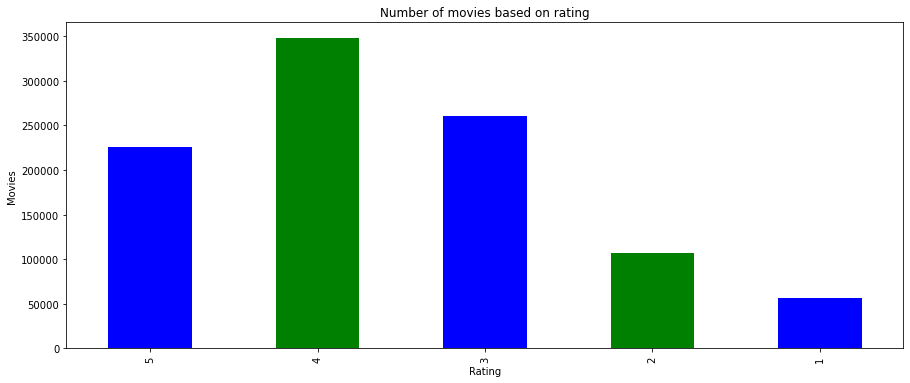

In [26]:
# The graph plotted below shows the total number of movies accoording to the rating. 
Movie_data["rating"].value_counts().sort_index(ascending=False). plot(kind= "bar",color = ["blue", "green"], figsize = (15,6),title = "Number of movies based on rating", xlabel = "Rating",ylabel = "Movies")
plt.show()

 #### Count function is used and sort it according to the rating. 
####  ** Movie_data["rating"].value_counts():-   Counts the occurrences of each unique rating in the "rating" column of the Movie_data DataFrame. It returns a Pandas Series with the counts for each rating.

####  ** .sort_index(ascending=False):-  Sorts the counts in descending order based on the index (which is the ratings). This ensures that the highest ratings are plotted first.




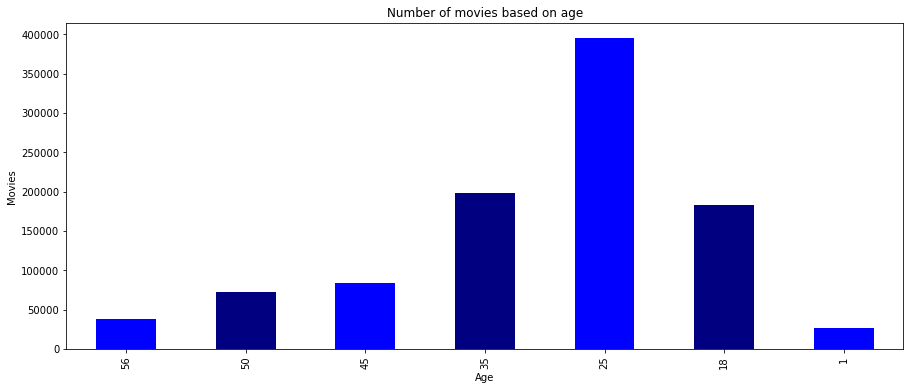

In [27]:
# Distribution of the age category and movies watched 
Movie_data["Age"].value_counts().sort_index(ascending=False). plot(kind= "bar",color = ["blue", "navy"], figsize = (15,6),title = "Number of movies based on age", xlabel = "Age",ylabel = "Movies")
plt.show()

#### The graph suggests that the people with age around 25 watches the movies alot.

In [28]:
Movie_data["movie_name"].unique()

array(['Shine', 'Verdict, The', 'Shall We Dance? (Shall We Dansu?)', ...,
       'White Boys', 'One Little Indian',
       'Five Wives, Three Secretaries and Me'], dtype=object)

In [29]:
Movie_data["userid"].unique()

array([   2,    3,    4, ..., 6038, 6039, 6040], dtype=int64)

#### The data we have is very large so, we have to consider a sample of each data to do the visualisation, otherwise the output may not be clear to us. 

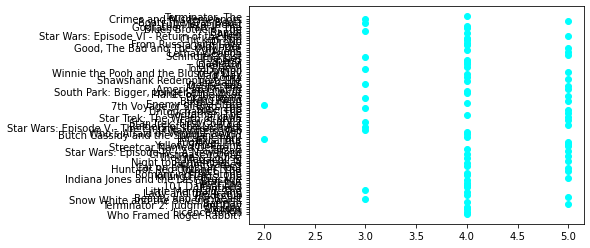

In [30]:
# Consider the movies reviewd by a particular customer with customer id = 1000
rate1000 = Movie_data[Movie_data.userid == 1000]
plt.scatter(y=rate1000.movie_name, x=rate1000.rating , color = 'aqua')
plt.show()


#### Due to the large number of data the graph is not clear

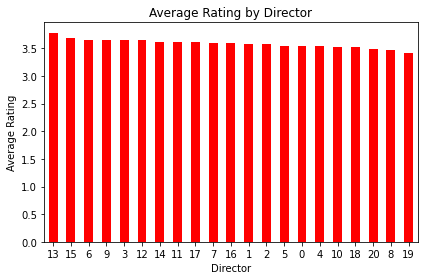

In [31]:
# Plot the average ratings
director_rating.plot(kind='bar', color='red')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Average Rating by Director')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### The average rating is almost near to 3.5 ratings. 

# Consider the movies reviewd by a particular customer with year = 1993
rateyear = Movie_data[Movie_data.release_year == 1993]
plt.scatter(y=rateyear.movie_name, x=rateyear.rating , color = 'red')
plt.show()

In [32]:
Movie_data.columns

Index(['userid', 'MovieID', 'rating', 'timestamp', 'Gender', 'Age', 'director',
       'zipcode', 'Genres', 'release_year', 'movie_name', 'Release year'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

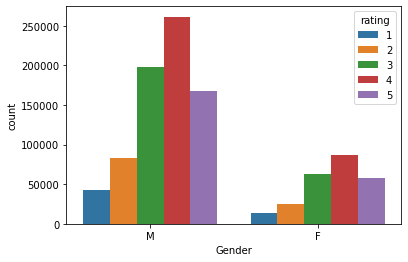

In [33]:
# using seaborn plot a graph which shows rating by gender 
sns.countplot(x = Movie_data["Gender"], hue = Movie_data["rating"])

<AxesSubplot:xlabel='Age', ylabel='count'>

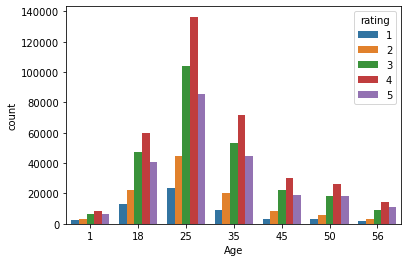

In [34]:
# using seaborn plot a graph which shows rating by age.
sns.countplot(x = Movie_data["Age"], hue = Movie_data["rating"])

## Machine learning 

#### The given data contains non numerical values. Use feature engineering to convert the gender and then drop other columns which is not requires

In [42]:
Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 1000155
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          998080 non-null  int64 
 1   MovieID         998080 non-null  int64 
 2   rating          998080 non-null  int64 
 3   timestamp       998080 non-null  int64 
 4   Gender          998080 non-null  object
 5   Age             998080 non-null  int64 
 6   director        998080 non-null  int64 
 7   zipcode         998080 non-null  object
 8   Genres          998080 non-null  object
 9   release_year    998080 non-null  object
 10  movie_name      998080 non-null  object
 11  Release year    998080 non-null  object
 12  gender_encoded  998080 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 138.9+ MB


#### one- hot encoding

In [43]:
# To convert Gender data into numerical value use one-hot encoding.
gender_encoded = pd.get_dummies(Movie_data["Gender"], prefix=["gender_col"])

# Concatenate the original DataFrame and the encoded columns
movie_data_encoded = pd.concat([Movie_data, gender_encoded], axis=1)

print(movie_data_encoded)

         userid  MovieID  rating  timestamp Gender  Age  director zipcode  \
0             2     1357       5  978298709      M   56        16   70072   
1             2     3068       4  978299000      M   56        16   70072   
2             2     1537       4  978299620      M   56        16   70072   
3             2      647       3  978299351      M   56        16   70072   
4             2     2194       4  978299297      M   56        16   70072   
...         ...      ...     ...        ...    ...  ...       ...     ...   
1000151    6040     1091       1  956716541      M   25         6   11106   
1000152    6040     1094       5  956704887      M   25         6   11106   
1000153    6040      562       5  956704746      M   25         6   11106   
1000154    6040     1096       4  956715648      M   25         6   11106   
1000155    6040     1097       4  956715569      M   25         6   11106   

                                  Genres release_year  \
0                 

In [36]:
# Assign encoded data to a new column in the table
Movie_data['gender_encoded'] = Movie_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

print(Movie_data)


         userid  MovieID  rating  timestamp Gender  Age  director zipcode  \
0             2     1357       5  978298709      M   56        16   70072   
1             2     3068       4  978299000      M   56        16   70072   
2             2     1537       4  978299620      M   56        16   70072   
3             2      647       3  978299351      M   56        16   70072   
4             2     2194       4  978299297      M   56        16   70072   
...         ...      ...     ...        ...    ...  ...       ...     ...   
1000151    6040     1091       1  956716541      M   25         6   11106   
1000152    6040     1094       5  956704887      M   25         6   11106   
1000153    6040      562       5  956704746      M   25         6   11106   
1000154    6040     1096       4  956715648      M   25         6   11106   
1000155    6040     1097       4  956715569      M   25         6   11106   

                                  Genres release_year  \
0                 

In [44]:
# Consider the data required for Ml
mlinput = Movie_data.drop(['zipcode', 'Genres',"movie_name","rating","Gender","release_year"], axis =1)
mltarget = Movie_data["rating"]

In [45]:
mlinput.head()

,userid,MovieID,timestamp,Age,director,Release year,gender_encoded
0,2,1357,978298709,56,16,1996,0
1,2,3068,978299000,56,16,1982,0
2,2,1537,978299620,56,16,1996,0
3,2,647,978299351,56,16,1996,0
4,2,2194,978299297,56,16,1987,0


In [46]:
mltarget.head()

0    5
1    4
2    4
3    3
4    4
Name: rating, dtype: int64

In [47]:
# Training the model using the logistic regression
# to increase the accuracy of the production use MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(mlinput)
scaled_df = pd.DataFrame(scaled_data, columns = mlinput.columns)
scaled_df.head()

,userid,MovieID,timestamp,Age,director,Release year,gender_encoded
0,0.0,0.343038,0.240609,1.0,0.8,0.950617,0.0
1,0.0,0.776203,0.240612,1.0,0.8,0.777778,0.0
2,0.0,0.388608,0.240619,1.0,0.8,0.950617,0.0
3,0.0,0.163291,0.240616,1.0,0.8,0.950617,0.0
4,0.0,0.554937,0.240615,1.0,0.8,0.839506,0.0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mlinput,mltarget,test_size = 0.4)
print(Y_test)

526799    3
39828     4
74366     1
546443    1
405381    3
         ..
65000     5
741733    4
425921    3
530769    2
936006    3
Name: rating, Length: 399232, dtype: int64


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [60]:
X_test = np.array(X_test)
model.predict(X_test)


array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [61]:
print(Y_test)

526799    3
39828     4
74366     1
546443    1
405381    3
         ..
65000     5
741733    4
425921    3
530769    2
936006    3
Name: rating, Length: 399232, dtype: int64
